In [15]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import sqlite3 as lite
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/43.0.2357.124 Safari/537.36'}

In [17]:
cities = [['tx', "austin"] ,[ 'ca' , 'los-angeles'] ,[ 'ga' , 'atlanta'] ,[ 'ma' , 'boston'] ,[ 'nc' , 'charlotte'] ,[ 'tx' , 'dallas'] ,[ 'co' , 'denver'] ,[ 'tx' , 'houston'] ,[ 'fl' , 'miami'] ,[ 'mn' , 'minneapolis'] ,[ 'ny' , 'new-york'] ,[ 'pa' , 'philadelphia'] ,[ 'az' , 'phoenix'] ,[ 'or' , 'portland'] ,[ 'ca' , 'san-francisco'] ,[ 'ca' , 'san-diego'] ,[ 'wa' , 'seattle'] ,[ 'dc' , 'washington'] ]

In [18]:
# CRAWL ALL THE PAGES OF INTERST
#for city in cities:
    #k = city[0]
    #v = city[1]
datadir = 'crawl/'
if not(os.path.isdir(datadir)):
    os.makedirs(datadir)

for city in cities:
    k = city[0]
    v = city[1]
    running = True
    page = 1
    print ''
    print k,v
    while running:
        url = "https://dogvacay.com/dog-boarding--" + k + "--" + v + "?p="+str(page)
        filename = datadir + k + '-' + v + '-' + str(page) + '.htm'
        if not(os.path.isfile(filename)):
            sys.stdout.write('-')
            r = requests.get(url, headers=headers)
            time.sleep(1)
            f = open(filename, 'w')
            f.write(r.text.encode('ascii', 'replace'))
            f.close()
            data = r.text
        else:
            sys.stdout.write('.')
            f = open(filename, 'r')
            data = f.read()
            f.close()
        soup = BeautifulSoup(data)
        pagination_links = soup.findAll('a', {'class': 'pagination-link'})
        running = False
        for pl in pagination_links:
            if pl.text.find('Next') == 0:
                running = True
        page+=1



tx austin
---------
ca los-angeles
--------------------------------------------------------
ga atlanta
............
ma boston
.............
nc charlotte
.......
tx dallas
------------
co denver
...........
tx houston
...........
fl miami
.........
mn minneapolis
.......
ny new-york
...............................................................
pa philadelphia
............
az phoenix
.........
or portland
..........
ca san-francisco
-----------------------------
ca san-diego
............
wa seattle
..........
dc washington
...........................

In [19]:
# Data extraction phase

times = []
fees = []
reviews = []
repeats = []
city = []
service = []
rating = []



for src in os.listdir(datadir):
    filename = datadir + src
    print 'Processing: ' + filename
    f = open(filename, 'r')
    data = f.read()
    f.close()
    soup = BeautifulSoup(data)
    sitters = soup.findAll('div', {'class': 'card-content'})
    for sitter in sitters:
        rtwrap = sitter.findAll('div', {'class': 'icon-wrapper'})
        if len(rtwrap) > 0:
            response_time = rtwrap[0].text.strip('\n')[19:]
        else:
            response_time = -1
        fee = sitter.findAll('div', {'class': 'price price--primary u-text-center'})
        review = sitter.find('span', {'class': 'vcard-review'})
        if review is not None and len(review) > 0:
            review = int(review.text.replace('Reviews', '').replace('Review', '').strip())
        else:
            review = 0
        repeat = sitter.findAll('div', {'class': 'icon-wrapper'})
        if len(repeat) == 2:
            repeat = repeat[1].text.strip('\n')[1]
        else:
            repeat = 0
        services = sitter.findAll('div', {'class': 'vcard-line-item'})
        full_star = sitter.findAll('i', {'class': 'ck-star'})
        ratings = len(full_star)
        half_star = sitter.findAll('i', {'class': 'ck-star-half'})
        if len(half_star) > 0:
            ratings += .5
        fees.append(fee[0].text.strip('\n$')[:2])
        title = soup.find('title').text
        i = title.find(' Dog Boarding')
        title = title[0:i]
        city.append(title)
        times.append(response_time)
        reviews.append(review)
        repeats.append(repeat)
        service.append(services[-1].text.strip('\n'))
        rating.append(ratings)

df = pd.DataFrame({'city': city, 'fee': fees, 'response_time': times, 'review' : reviews, 'repeat' : repeats, 'services' : service, 'ratings': rating})

Processing: crawl/az-phoenix-1.htm
Processing: crawl/az-phoenix-2.htm
Processing: crawl/az-phoenix-3.htm
Processing: crawl/az-phoenix-4.htm
Processing: crawl/az-phoenix-5.htm
Processing: crawl/az-phoenix-6.htm
Processing: crawl/az-phoenix-7.htm
Processing: crawl/az-phoenix-8.htm
Processing: crawl/az-phoenix-9.htm
Processing: crawl/ca-los-angeles-1.htm
Processing: crawl/ca-los-angeles-10.htm
Processing: crawl/ca-los-angeles-11.htm
Processing: crawl/ca-los-angeles-12.htm
Processing: crawl/ca-los-angeles-13.htm
Processing: crawl/ca-los-angeles-14.htm
Processing: crawl/ca-los-angeles-15.htm
Processing: crawl/ca-los-angeles-16.htm
Processing: crawl/ca-los-angeles-17.htm
Processing: crawl/ca-los-angeles-18.htm
Processing: crawl/ca-los-angeles-19.htm
Processing: crawl/ca-los-angeles-2.htm
Processing: crawl/ca-los-angeles-20.htm
Processing: crawl/ca-los-angeles-21.htm
Processing: crawl/ca-los-angeles-22.htm
Processing: crawl/ca-los-angeles-23.htm
Processing: crawl/ca-los-angeles-24.htm
Process

In [21]:
df.shape

(4662, 7)

In [20]:
df.head()

,city,fee,ratings,repeat,response_time,review,services
0,"Phoenix, Arizona",35,5,8,Few Hours,26,Boarding and Daycare
1,"Phoenix, Arizona",35,5,1,Day,30,"Boarding, Checkups and Visits, and Pick up and..."
2,"Phoenix, Arizona",35,0,0,Few Hours,0,"Boarding, Daycare, Checkups and Visits, Walkin..."
3,"Phoenix, Arizona",38,5,2,Few Days,3,"Boarding, Daycare, Checkups and Visits, Walkin..."
4,"Phoenix, Arizona",25,5,1,Few Hours,5,"Boarding, Checkups and Visits, Walking, and Ba..."


In [22]:
# SAVE TO CSV FILE

df.to_csv('dog-vacay.csv', sep='\t')

In [23]:
#separate services
df['boarding'] = df['services'].map(lambda x: 1 if "Boarding" in x else 0)
df['sitting'] = df['services'].map(lambda x: 1 if "Sitting" in x else 0)
df['daycare'] = df['services'].map(lambda x: 1 if "Daycare" in x else 0)
df['checkups'] = df['services'].map(lambda x: 1 if "Checkups and Visits" in x else 0)
df['walking'] = df['services'].map(lambda x: 1 if "Walking" in x else 0)
df['bathing'] = df['services'].map(lambda x: 1 if "Bathing" in x else 0)
df['training'] = df['services'].map(lambda x: 1 if "Training" in x else 0)
df['grooming'] = df['services'].map(lambda x: 1 if "Grooming" in x else 0)
df['pickup/dropoff'] = df['services'].map(lambda x: 1 if "Pick up and Drop off" in x else 0)

In [24]:
# drop services column
df.drop(['services'], axis=1, inplace=True)

In [25]:
#response time
df['response_time'] = df['response_time'].map(lambda x: 1 if x == 'Few Hours                        ' else 2 if x == 'Day                        ' else 3)

In [26]:
df.head()

,city,fee,ratings,repeat,response_time,review,boarding,sitting,daycare,checkups,walking,bathing,training,grooming,pickup/dropoff
0,"Phoenix, Arizona",35,5,8,1,26,1,0,1,0,0,0,0,0,0
1,"Phoenix, Arizona",35,5,1,2,30,1,0,0,1,0,0,0,0,1
2,"Phoenix, Arizona",35,0,0,1,0,1,0,1,1,1,0,0,0,0
3,"Phoenix, Arizona",38,5,2,3,3,1,0,1,1,1,0,0,0,0
4,"Phoenix, Arizona",25,5,1,1,5,1,0,0,1,1,1,0,0,0


In [34]:
df.dtypes

city               object
fee                object
ratings           float64
repeat             object
response_time       int64
review              int64
boarding            int64
sitting             int64
daycare             int64
checkups            int64
walking             int64
bathing             int64
training            int64
grooming            int64
pickup/dropoff      int64
dtype: object

In [45]:
df["fee"] = df["fee"].astype(float)
df["repeat"] = df["repeat"].astype(int)

ValueError: could not convert string to float: 

In [37]:
df.describe()

,ratings,response_time,review,boarding,sitting,daycare,checkups,walking,bathing,training,grooming,pickup/dropoff
count,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.00000,4662.000000
mean,3.416345,1.582154,9.806521,0.947662,0.349206,0.637066,0.431145,0.403904,0.154011,0.028529,0.01094,0.199914
std,2.308807,0.767003,19.448652,0.222732,0.476770,0.480898,0.495289,0.490731,0.360998,0.166495,0.10403,0.399979
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,5.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,5.000000,2.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
max,5.000000,3.000000,370.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


/Users/Ryan/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
/Users/Ryan/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
/Users/Ryan/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2809: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))
/Users/Ryan/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2809: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s

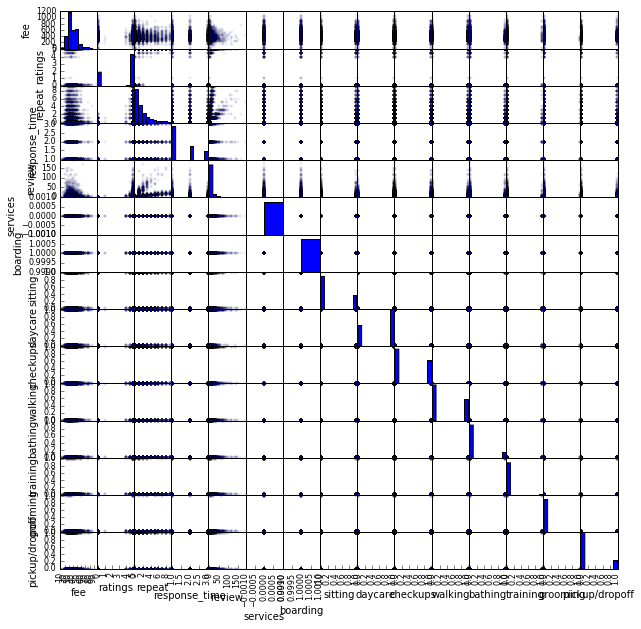

In [14]:
#Create a scatter plot matrix
a = pd.scatter_matrix(df, alpha=.05, figsize=(10,10))
plt.show()

In [110]:
#s = df['response_time'][0]
#sentence = ''.join(s.split())
#sentence

u'FewHours'

In [152]:
#Histogram of fees
p = df['fee'].hist()
plt.show()

In [153]:
#Histogram of repeat guests
p = df['repeat'].hist()
plt.show()

In [174]:
#Histogram of review
p = df['review'].hist()
plt.show()

In [192]:
df.groupby('city').sum()

,fee,ratings,repeat,response_time,review,services,boarding,sitting,daycare,checkups,walking,bathing,training,grooming,pickup/dropoff
city,,,,,,,,,,,,,,,
"Atlanta, Georgia",5509,702.5,321,278,2317,0,171,63,128,84,58,29,6,2,33
"Boston, Massachusetts",7573,774.5,360,300,1953,0,185,48,109,70,66,23,2,0,43
"Charlotte, North Carolina",2931,383.5,207,163,1089,0,93,38,72,49,35,13,5,1,7
"Denver, Colorado",5059,615.5,353,264,2073,0,162,46,114,57,52,13,0,1,40
"Houston, Texas",4932,556.0,279,216,2167,0,153,42,107,82,42,35,5,5,23
"Miami, Florida",4616,437.5,190,215,1132,0,134,43,97,63,65,34,7,0,23
"Minneapolis, Minnesota",3249,419.0,250,160,1350,0,105,19,61,34,38,19,0,0,24
"New York, New York",42007,2669.5,1186,1476,5240,0,942,284,566,347,381,134,21,6,203
"Philadelphia, Pennsylvania",6362,600.0,277,282,1917,0,174,48,116,73,68,25,1,1,32


In [219]:
phx = df[df.city == 'Phoenix, Arizona']
sea = df[df.city == 'Seattle, Washington']
atx = df[df.city == 'Austin, Texas']

In [222]:
sea.describe()

,fee,ratings,repeat,response_time,review,services,boarding,sitting,daycare,checkups,walking,bathing,training,grooming,pickup/dropoff
count,136.000000,136.000000,136.000000,136.000000,136.000000,136,136,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,33.757353,4.000000,2.147059,1.463235,12.132353,0,1,0.301471,0.757353,0.463235,0.411765,0.117647,0.051471,0.014706,0.139706
std,10.111597,1.959781,2.189299,0.719136,21.998926,0,0,0.460593,0.430268,0.500490,0.493972,0.323381,0.221772,0.120818,0.347963
min,15.000000,0.000000,0.000000,1.000000,0.000000,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,4.500000,0.000000,1.000000,1.000000,0,1,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.000000,5.000000,2.000000,1.000000,4.500000,0,1,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40.000000,5.000000,3.000000,2.000000,10.000000,0,1,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,85.000000,5.000000,9.000000,3.000000,117.000000,0,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
